## Importing Packages

In [1]:
#!pip install tifffile
#!pip install pims
#!pip install libtiff
# !pip install napari
#!pip install papillon
#!pip install stats

In [173]:
import glob
import tifffile
import numpy as np
import os
import pims
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
from mpl_toolkits.mplot3d import axes3d, Axes3D
import pandas as pd
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from matplotlib import gridspec 
#from sklearn.cluster import OPTICS, cluster_optics_dbscan 
from sklearn.preprocessing import normalize, StandardScaler 
%matplotlib notebook
# import napari
# #%matplotlib inline
# import napari
from numpy import *
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d
import imageio
import papillon as pp
import scipy
import json
import stats
#%matplotlib inline

## Reading files (input path)

In [174]:
tif_file_iod = sorted(glob.glob(os.path.join(r"C:/Users/acoskun7/Documents/data/Nalm6Fig4100217/Deconvcell11iod", "*.tif")))
tif_file_phos = sorted(glob.glob(os.path.join(r"C:/Users/acoskun7/Documents/data/Nalm6Fig4100217/Deconvcell11Phos", "*.tif")))
tif_file_rna = sorted(glob.glob(os.path.join(r"C:/Users/acoskun7/Documents/data/Nalm6Fig4100217/Deconvcell11RNA", "*.tif")))


#tif_file_iod = sorted(glob.glob(os.path.join(r"C:\Users\shamb\Documents\GRA\Super Resolution\IodReplislices", "*.tif")))
#tif_file_phos = sorted(glob.glob(os.path.join(r"C:\Users\shamb\Documents\GRA\Super Resolution\PhosNcell", "*.tif")))
#tif_file_rna = sorted(glob.glob(os.path.join(r"C:\Users\shamb\Documents\GRA\Super Resolution\RNA", "*.tif")))

## Input range of slices

In [175]:
a = np.arange(0,301,1)
#a = np.arange(20,120,1) 

## Calculating iodine, phos, rna values without zeros

In [176]:
#rangevals = [130,180,105,155]
rangevals = [100,200,78,155]

#rangevals = [140,160,118,138]

## Saving Cropped Images

In [177]:
path_current = os.getcwd()
path_folder = os.path.join(path_current,'Cropped Files11')
if os.path.isdir(path_folder) == False:
        os.mkdir(path_folder)

os.chdir(path_folder)
for k in a:
    iod_1 = tifffile.imread(tif_file_iod[k])[rangevals[0]:rangevals[1],rangevals[2]:rangevals[3]]
    
#################################################################################################
#     tiff = TIFF.open('iod_cropped_' + str(k)  + '.tif', mode='w')
#     tiff.write_image(iod_1)
#     tiff.close()
#################################################################################################
#    scipy.misc.imsave('iod_cropped_' + str(k)  + '.tif', iod_1)
#################################################################################################
#    imageio.imwrite('iod_cropped_' + str(k)  + '.tif', iod_1)
#################################################################################################

    description = "This is my description"
    # Extratags
    metadata_tag = json.dumps({"ChannelIndex": 1, "Slice": int(k)})
    extra_tags = [("MicroManagerMetadata", 's', 0, metadata_tag, True),
                  ("ProcessingSoftware", 's', 0, "my_code", True)]
    # ImageJ metadata. 'Info' tag needs to be a string
    ijinfo = {"InitialPositionList": [{"Label": "Pos1"}, {"Label": "Pos3"}]}
    ijmetadata = {"Info": json.dumps(ijinfo)}
    # Write file
    tifffile.imsave(
        'iod_cropped_' + str(k)  + '.tif',
        iod_1,
        ijmetadata=ijmetadata,
        description=description,
        extratags=extra_tags,
    )


os.chdir(path_current)

In [178]:
path_current = os.getcwd()
path_folder = os.path.join(path_current,'Cropped Files11')
if os.path.isdir(path_folder) == False:
        os.mkdir(path_folder)

os.chdir(path_folder)
for k in a:
    phos_1 = tifffile.imread(tif_file_phos[k])[rangevals[0]:rangevals[1],rangevals[2]:rangevals[3]]

##################################################################################    
#     tiff = TIFF.open('iod_cropped_' + str(k)  + '.tif', mode='w')
#     tiff.write_image(iod_1)
#     tiff.close()
#    matplotlib.image.imsave('phos_cropped_' + str(k) + '.tif',phos_1)
##################################################################################
#    scipy.misc.imsave('phos_cropped_' + str(k)  + '.tif', phos_1)
##################################################################################
    
#    imageio.imwrite('phos_cropped_' + str(k)  + '.tif', phos_1)
##################################################################################
    description = "This is my description"
    # Extratags
    metadata_tag = json.dumps({"ChannelIndex": 2, "Slice": int(k)})
    extra_tags = [("MicroManagerMetadata", 's', 0, metadata_tag, True),
                  ("ProcessingSoftware", 's', 0, "my_code", True)]
    # ImageJ metadata. 'Info' tag needs to be a string
    ijinfo = {"InitialPositionList": [{"Label": "Pos1"}, {"Label": "Pos3"}]}
    ijmetadata = {"Info": json.dumps(ijinfo)}
    # Write file
    tifffile.imsave(
        'phos_cropped_' + str(k)  + '.tif',
        phos_1,
        ijmetadata=ijmetadata,
        description=description,
        extratags=extra_tags,
    )

os.chdir(path_current)

In [179]:
path_current = os.getcwd()
path_folder = os.path.join(path_current,'Cropped Files11')
if os.path.isdir(path_folder) == False:
        os.mkdir(path_folder)

os.chdir(path_folder)
for k in a:
    rna_1 = tifffile.imread(tif_file_rna[k])[rangevals[0]:rangevals[1],rangevals[2]:rangevals[3]]
#################################################################################
#    matplotlib.image.imsave('rna_cropped_' + str(k) + '.tif',rna_1)
#    scipy.misc.imsave('rna_cropped_' + str(k)  + '.tif', rna_1)
#     tiff = TIFF.open('rna_cropped_' + str(k)  + '.tif', mode='w')
#     tiff.write_image(rna_1)
#     tiff.close() 
#################################################################################
#    imageio.imwrite('rna_cropped_' + str(k)  + '.tif', rna_1)
#################################################################################
    description = "This is my description"
    # Extratags
    metadata_tag = json.dumps({"ChannelIndex": 3, "Slice": int(k)})
    extra_tags = [("MicroManagerMetadata", 's', 0, metadata_tag, True),
                  ("ProcessingSoftware", 's', 0, "my_code", True)]
    # ImageJ metadata. 'Info' tag needs to be a string
    ijinfo = {"InitialPositionList": [{"Label": "Pos1"}, {"Label": "Pos3"}]}
    ijmetadata = {"Info": json.dumps(ijinfo)}
    # Write file
    tifffile.imsave(
        'rna_cropped_' + str(k)  + '.tif',
        rna_1,
        ijmetadata=ijmetadata,
        description=description,
        extratags=extra_tags,
    )

 
os.chdir(path_current)

In [180]:
iod_value = [] 
# phosphorous = [] 
# rna = [] 
x_count_iod = []
y_count_iod = []
z_count_iod = []
for k in a:
    zeros = 0
    iod_1 = tifffile.imread(tif_file_iod[k])[rangevals[0]:rangevals[1],rangevals[2]:rangevals[3]]
    w,h = np.shape(iod_1)
    for i in range(w):
        for j in range(h): 
            if iod_1[i,j] == 0:
                continue
            else: 
                iod_value.append(iod_1[i,j])
                x_count_iod.append(i)
                y_count_iod.append(j)
                z_count_iod.append(k)
    
    #print("Zeros in layer {}: {}".format(k, zeros/(w*h)))



In [181]:
phos_value = [] 
# rna = [] 
x_count_phos = []
y_count_phos = []
z_count_phos = []
for k in a:
    iod_1 = tifffile.imread(tif_file_phos[k])[rangevals[0]:rangevals[1],rangevals[2]:rangevals[3]]
    w,h = np.shape(iod_1)
    for i in range(w):
        for j in range(h): 
            if iod_1[i,j] == 0:
                continue
            else: 
                phos_value.append(iod_1[i,j])
                x_count_phos.append(i)
                y_count_phos.append(j)
                z_count_phos.append(k)

In [182]:
rna_value = [] 
# rna = [] 
x_count_rna = []
y_count_rna = []
z_count_rna = []
for k in a:
    iod_1 = tifffile.imread(tif_file_rna[k])[rangevals[0]:rangevals[1],rangevals[2]:rangevals[3]]
    w,h = np.shape(iod_1)
    for i in range(w):
        for j in range(h): 
            if iod_1[i,j] == 0:
                continue
            else:
                rna_value.append(iod_1[i,j])
                x_count_rna.append(i)
                y_count_rna.append(j)
                z_count_rna.append(k)

## Calculating iodine,phos,rna all values with all the position coordinates. 

In [183]:
iodine = [] 
phosphorous = [] 
rna = [] 
x_count = []
y_count = []
z_count = []
for k in a:
    iod_1 = tifffile.imread(tif_file_iod[k])[rangevals[0]:rangevals[1],rangevals[2]:rangevals[3]]
    phos_1 = tifffile.imread(tif_file_phos[k])[rangevals[0]:rangevals[1],rangevals[2]:rangevals[3]]
    rna_1 = tifffile.imread(tif_file_rna[k])[rangevals[0]:rangevals[1],rangevals[2]:rangevals[3]]
    w,h = np.shape(iod_1)
    for i in range(w):
        for j in range(h): 
#             if iod_1[i,j] == 0 and phos_1[i,j] == 0  and rna_1[i,j] == 0:
#                 zeros += 1
#             else: 
            iodine.append(iod_1[i,j])
            phosphorous.append(phos_1[i,j])
            rna.append(rna_1[i,j])
            x_count.append(i)
            y_count.append(j)
            z_count.append(k)
    
    #print("Zeros in layer {}: {}".format(k, zeros/(w*h)))
X = pd.DataFrame({'Column1': iodine, 'Column2': phosphorous,'Column3': rna})#,'Column4': x_count, 'Column5': y_count,'Column6': z_count})

## Clustering Algorithms

In [184]:
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) 
X_normalized = normalize(X_scaled) 
X_normalized = pd.DataFrame(X_normalized) 
kmeans = KMeans(n_clusters=6, random_state=111)
kmeans.fit(X_normalized)
kmeans.labels_

array([2, 2, 2, ..., 2, 2, 2])

In [185]:
kmeans_list = list(kmeans.labels_)
kmeans_list = kmeans_list
x_list = x_count
y_list = y_count
z_list = z_count

## Plotting all the clusters

## Seperating Clusters

In [186]:
zeros_indices = [i for i, x in enumerate(kmeans_list) if x == 0]    
one_indices = [i for i, x in enumerate(kmeans_list) if x == 1]
two_indices = [i for i, x in enumerate(kmeans_list) if x == 2]
three_indices = [i for i, x in enumerate(kmeans_list) if x == 3]
four_indices = [i for i, x in enumerate(kmeans_list) if x == 4]
five_indices = [i for i, x in enumerate(kmeans_list) if x == 5]

## Variables containing the coordinates of iodine, rna, Phosporous

In [187]:
iodine_array = np.c_[x_count_iod,y_count_iod,z_count_iod]
phos_array = np.c_[x_count_phos,y_count_phos,z_count_phos]
rna_array = np.c_[x_count_rna,y_count_rna,z_count_rna]

## define the clusters into seperate arrays

In [188]:
def array_def(x_list,y_list,z_list,zeros_indices):
    T,W,V= [x_list[i] for i in zeros_indices],[y_list[i] for i in zeros_indices],[z_list[i] for i in zeros_indices]
    zero_array = np.c_[T,W,V]
    zero_array_class = np.c_[zero_array,np.ones(len(zero_array))]
    return zero_array,zero_array_class

In [189]:
zero_array, zero_array_class = array_def(x_list,y_list,z_list,zeros_indices)
one_array, one_array_class = array_def(x_list,y_list,z_list,one_indices)
two_array, two_array_class = array_def(x_list,y_list,z_list,two_indices)
three_array, three_array_class = array_def(x_list,y_list,z_list,three_indices)
four_array, four_array_class = array_def(x_list,y_list,z_list,four_indices)
five_array, five_array_class = array_def(x_list,y_list,z_list,five_indices)

In [190]:
zero_array

array([[  2,  14,   0],
       [  3,  16,   0],
       [  3,  17,   0],
       ...,
       [ 99,  62, 300],
       [ 99,  71, 300],
       [ 99,  72, 300]])

In [191]:
#!pip install ordered_set

In [192]:
from ordered_set import OrderedSet

x_hashable = map(tuple, zero_array)
zero_set = OrderedSet(x_hashable)

x_hashable = map(tuple, one_array)
one_set = OrderedSet(x_hashable)

x_hashable = map(tuple, two_array)
two_set = OrderedSet(x_hashable)

x_hashable = map(tuple, three_array)
three_set = OrderedSet(x_hashable)

x_hashable = map(tuple, four_array)
four_set = OrderedSet(x_hashable)

x_hashable = map(tuple, five_array)
five_set = OrderedSet(x_hashable)

x_hashable = map(tuple, phos_array)
phos_set = OrderedSet(x_hashable)

x_hashable = map(tuple, rna_array)
rna_set = OrderedSet(x_hashable)

x_hashable = map(tuple, iodine_array)
iodine_set = OrderedSet(x_hashable)

## Operations for finding seperate points in clusters/iodine/phos/rna

In [193]:
wow_r0 = np.array(list(zero_set.intersection(rna_set)))
wow_r1 = np.array(list(one_set.intersection(rna_set)))
wow_r2 = np.array(list(two_set.intersection(rna_set)))
wow_r3 = np.array(list(three_set.intersection(rna_set)))
wow_r4 = np.array(list(four_set.intersection(rna_set)))
wow_r5 = np.array(list(five_set.intersection(rna_set)))

wow_i0 = np.array(list(zero_set.intersection(iodine_set)))
wow_i1 = np.array(list(one_set.intersection(iodine_set)))
wow_i2 = np.array(list(two_set.intersection(iodine_set)))
wow_i3 = np.array(list(three_set.intersection(iodine_set)))
wow_i4 = np.array(list(four_set.intersection(iodine_set)))
wow_i5 = np.array(list(five_set.intersection(iodine_set)))

wow_p0 = np.array(list(zero_set.intersection(phos_set)))
wow_p1 = np.array(list(one_set.intersection(phos_set)))
wow_p2 = np.array(list(two_set.intersection(phos_set)))
wow_p3 = np.array(list(three_set.intersection(phos_set)))
wow_p4 = np.array(list(four_set.intersection(phos_set)))
wow_p5 = np.array(list(five_set.intersection(phos_set)))

In [194]:
def intersect_fn(zero_set,iodine_set,iod_value):
    final_iodine_zero = np.zeros(len(zero_set))
    iod_ordered = zero_set.intersection(iodine_set)
    lol = OrderedSet(iod_ordered).intersection(zero_set)
    iodine_cluster_zero = []
    for i in range(len(lol)):
        final_iodine_zero[zero_set.index(lol[i])] = iod_value[iodine_set.index(lol[i])]
        iodine_cluster_zero.append(iod_value[iodine_set.index(lol[i])])
    return final_iodine_zero, iodine_cluster_zero

In [195]:
final_iodine_zero, iodine_cluster_zero = intersect_fn(zero_set,iodine_set,iod_value)
final_iodine_one, iodine_cluster_one = intersect_fn(one_set,iodine_set,iod_value)
final_iodine_two, iodine_cluster_two = intersect_fn(two_set,iodine_set,iod_value)
final_iodine_three, iodine_cluster_three = intersect_fn(three_set,iodine_set,iod_value)
final_iodine_four, iodine_cluster_four = intersect_fn(four_set,iodine_set,iod_value)
final_iodine_five, iodine_cluster_five = intersect_fn(five_set,iodine_set,iod_value)

In [196]:
print(len(final_iodine_zero))
print(len(final_iodine_one))
print(len(final_iodine_two))
print(len(final_iodine_three))
print(len(final_iodine_four))
print(len(final_iodine_five))

310515
585542
798603
176852
293298
152890


In [197]:
final_rna_zero, rna_cluster_zero = intersect_fn(zero_set,rna_set,rna_value)
final_rna_one, rna_cluster_one = intersect_fn(one_set,rna_set,rna_value)
final_rna_two, rna_cluster_two = intersect_fn(two_set,rna_set,rna_value)
final_rna_three, rna_cluster_three = intersect_fn(three_set,rna_set,rna_value)
final_rna_four, rna_cluster_four = intersect_fn(four_set,rna_set,rna_value)
final_rna_five, rna_cluster_five = intersect_fn(five_set,rna_set,rna_value)

In [198]:
final_phos_zero,phos_cluster_zero = intersect_fn(zero_set,phos_set,phos_value)
final_phos_one,phos_cluster_one = intersect_fn(one_set,phos_set,phos_value)
final_phos_two,phos_cluster_two = intersect_fn(two_set,phos_set,phos_value)
final_phos_three,phos_cluster_three = intersect_fn(three_set,phos_set,phos_value)
final_phos_four,phos_cluster_four = intersect_fn(four_set,phos_set,phos_value)
final_phos_five,phos_cluster_five = intersect_fn(five_set,phos_set,phos_value)

## Normalizing the groups

In [199]:
final_iodine_two_normalized = (final_iodine_two-np.min(final_iodine_two))/np.ptp(final_iodine_two)
final_iodine_four_normalized = (final_iodine_four-np.min(final_iodine_four))/np.ptp(final_iodine_four)
final_rna_two_normalized = (final_rna_two-np.min(final_rna_two))/np.ptp(final_rna_two)
final_rna_four_normalized = (final_rna_four-np.min(final_rna_four))/np.ptp(final_rna_four)
final_phos_zero_normalized = (final_phos_zero-np.min(final_phos_zero))/np.ptp(final_phos_zero)
final_phos_one_normalized = (final_phos_one-np.min(final_phos_one))/np.ptp(final_phos_one)
final_phos_two_normalized = (final_phos_two-np.min(final_phos_two))/np.ptp(final_phos_two)
final_phos_three_normalized = (final_phos_three-np.min(final_phos_three))/np.ptp(final_phos_three)
final_phos_four_normalized = (final_phos_four-np.min(final_phos_four))/np.ptp(final_phos_four)
final_phos_five_normalized = (final_phos_five-np.min(final_phos_five))/np.ptp(final_phos_five)

## Bar Graph for final sum count

<IPython.core.display.Javascript object>


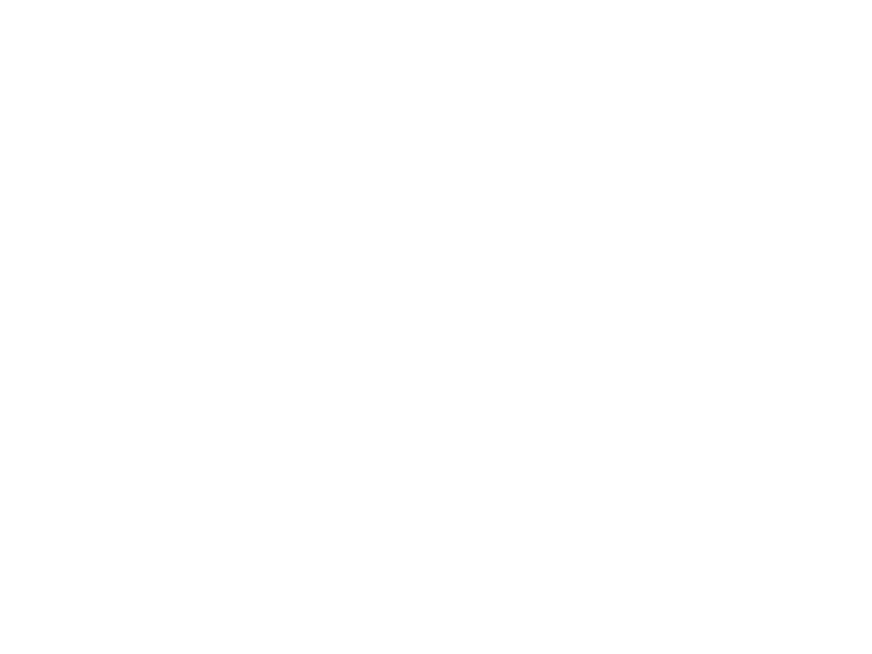

Text(0.5, 1.0, '2nd Cluster')

In [200]:
fig = plt.figure()
ax = fig.add_subplot(111)

# x-coordinates of left sides of bars  
left = [1, 2] 
  
# heights of bars 
height = [sum(final_iodine_two),sum(final_rna_two)] 
  
# labels for bars 
tick_label = ['Iodine', 'RNA'] 
  
# plotting a bar chart 
plt.bar(left, height, tick_label = tick_label, 
        width = 0.8, color = ['red', 'green']) 
  
# naming the x-axis 
plt.xlabel('x - axis') 
# naming the y-axis 
plt.ylabel('y - axis') 
# plot title 
plt.title('2nd Cluster') 

<IPython.core.display.Javascript object>


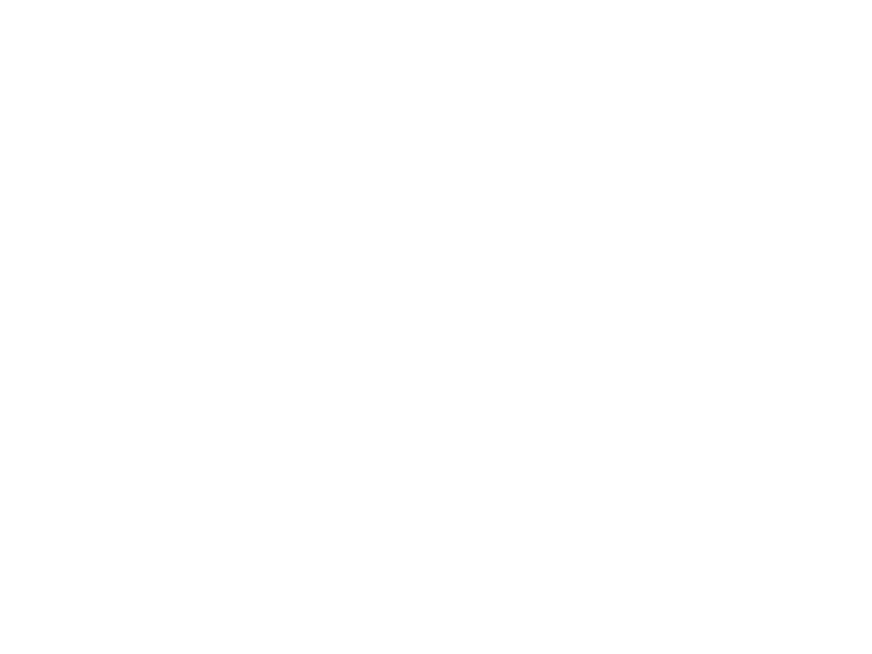

Text(0.5, 1.0, '4th Cluster')

In [201]:
fig = plt.figure()
ax = fig.add_subplot(111)

# x-coordinates of left sides of bars  
left = [1, 2] 
  
# heights of bars 
height = [sum(final_iodine_four),sum(final_rna_four)] 
  
# labels for bars 
tick_label = ['Iodine', 'RNA'] 
  
# plotting a bar chart 
plt.bar(left, height, tick_label = tick_label, 
        width = 0.8, color = ['red', 'green']) 
  
# naming the x-axis 
plt.xlabel('x - axis') 
# naming the y-axis 
plt.ylabel('y - axis') 
# plot title 
plt.title('4th Cluster') 

## Heat Map with different commands and colour maps

In [202]:
heat_map_iod = [sum(final_iodine_zero),sum(final_iodine_one),sum(final_iodine_two),sum(final_iodine_three),sum(final_iodine_four),sum(final_iodine_five)]
heat_map_rna = [sum(final_rna_zero),sum(final_rna_one),sum(final_rna_two),sum(final_rna_three),sum(final_rna_four),sum(final_rna_five)]
heat_map_phos = [sum(final_phos_zero),sum(final_phos_one),sum(final_phos_two),sum(final_phos_three),sum(final_phos_four),sum(final_phos_five)]
X = pd.DataFrame({'Iodine': heat_map_iod, 'Phosphorous': heat_map_phos,'RNA': heat_map_rna})
X = np.log(X)



In [203]:

biomarkers = ["Iodine","Phosphorous","RNA"]
clusters = ["first", "second", "third",
           "fourth", "fifth", "sixth"]

pixel_values = np.c_[heat_map_iod,heat_map_phos,heat_map_rna]
pixel_values.transpose()

array([[3.6009000e+04, 5.0641900e+05, 3.8915800e+05, 4.0765390e+06,
        3.7600000e+04, 9.1611800e+05],
       [4.1890746e+07, 1.3848934e+08, 6.1459370e+07, 3.3679720e+07,
        4.9960302e+07, 2.4599096e+07],
       [3.1823700e+05, 1.1824780e+06, 1.1474700e+06, 1.3529280e+06,
        3.1694900e+05, 4.4729100e+06]])

In [204]:
from numpy import inf
heat_map_iod = [sum(final_iodine_zero),sum(final_iodine_one),sum(final_iodine_two),sum(final_iodine_three),sum(final_iodine_four),sum(final_iodine_five)]
heat_map_rna = [sum(final_rna_zero),sum(final_rna_one),sum(final_rna_two),sum(final_rna_three),sum(final_rna_four),sum(final_rna_five)]
heat_map_phos = [sum(final_phos_zero),sum(final_phos_one),sum(final_phos_two),sum(final_phos_three),sum(final_phos_four),sum(final_phos_five)]


## Zscore code

In [205]:
#!pip install matplotlib==3.1.0 --user

<IPython.core.display.Javascript object>


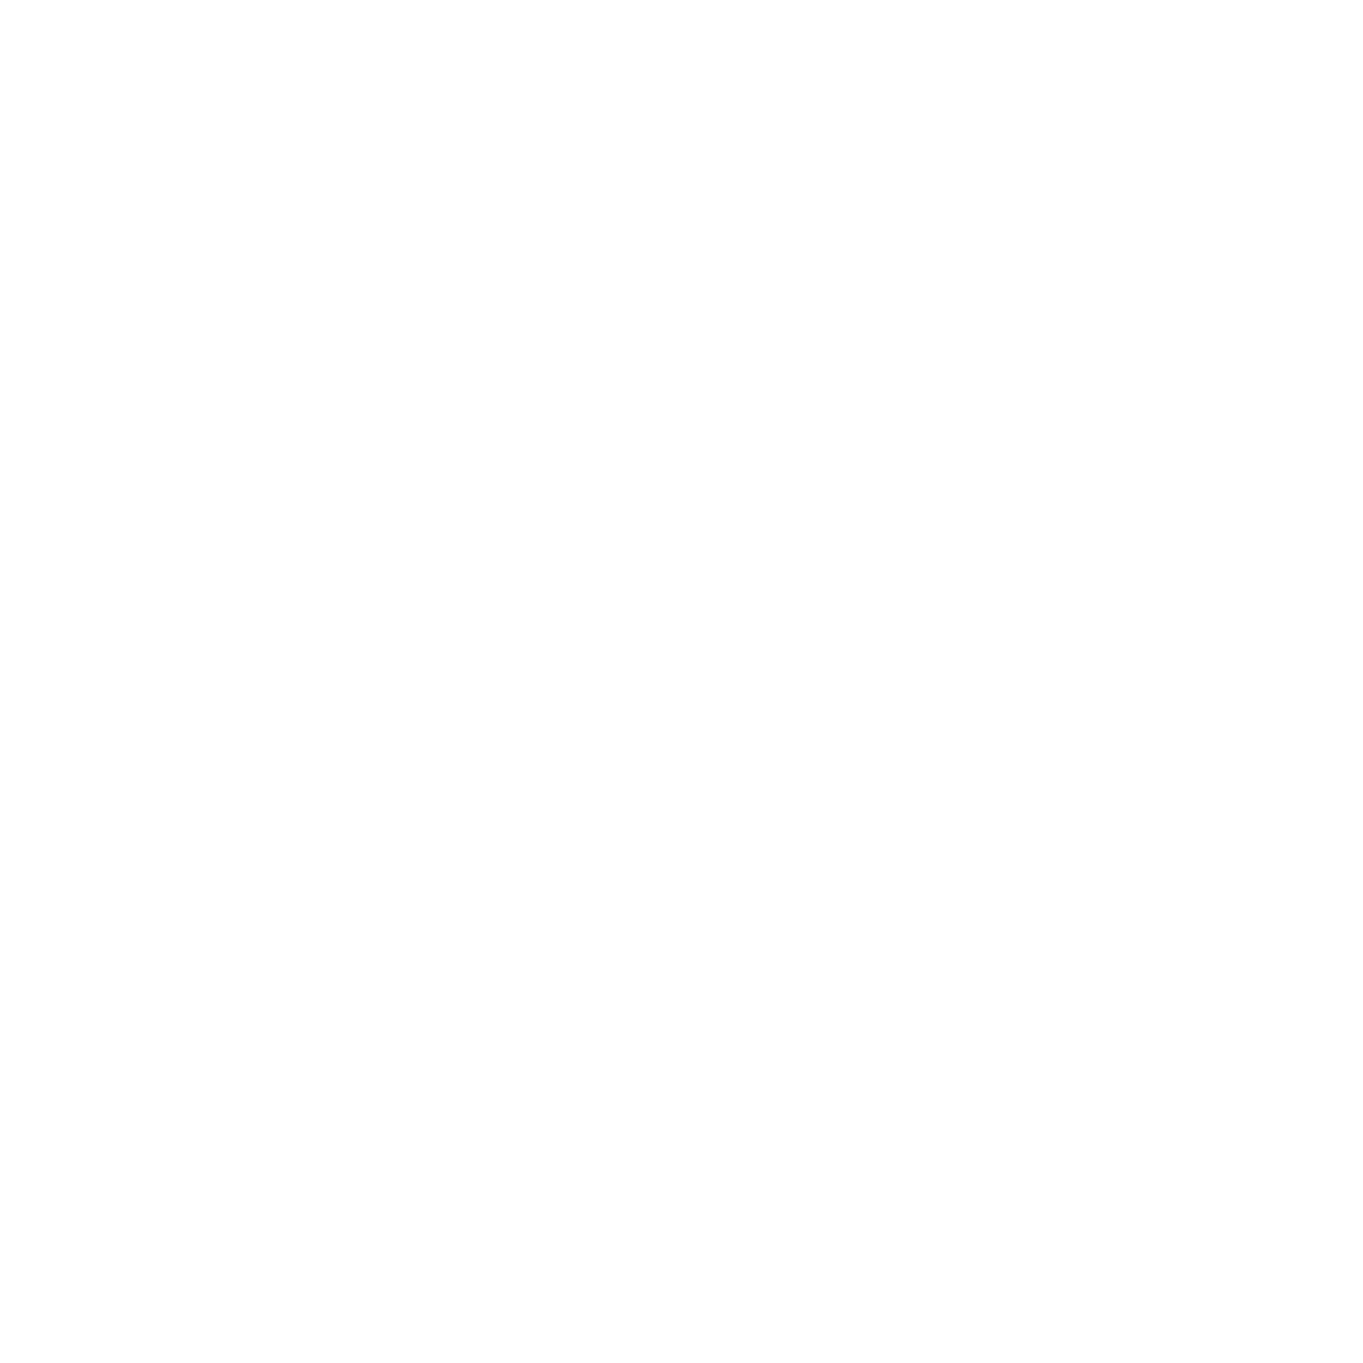

In [206]:
sns.set(rc={'axes.facecolor':'cornflowerblue', 'figure.facecolor':'black'})

iod_zscore= scipy.stats.zscore(heat_map_iod, axis = 0)
rna_zscore= scipy.stats.zscore(heat_map_rna, axis = 0)
phos_zscore= scipy.stats.zscore(heat_map_phos, axis = 0)
X_zscore = pd.DataFrame({'IdU': iod_zscore, 'BrdU': rna_zscore,'Phos': phos_zscore})
name = ['1','2','3','4','5','6']
X_zscore['Name'] = name
X_zscore = X_zscore.set_index('Name')
del X_zscore.index.name

cbar_kws = {"shrink":1
            }

# Cluster map without standardisation


g = sns.clustermap(X_zscore,cmap="viridis",row_cluster =True,col_cluster  = False )


plt.style.use("dark_background")
#changing the label size and color of color bar
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=16) #label size
cax.tick_params(color='w') #tick color
cax.tick_params(labelcolor='w') # label color



#PLease replace colours with 'w'
#this is for updating size and color of labels of the heat map

my_colors = ['w', 'w', 'w', 'w', 'w', 'w', 'w']

for ticklabel, tickcolor in zip(g.ax_heatmap.axes.get_yticklabels(), my_colors):
    ticklabel.set_color(tickcolor)

for ticklabel, tickcolor in zip(g.ax_heatmap.axes.get_xticklabels(), my_colors):
    ticklabel.set_color(tickcolor)

# heat map color
g.ax_heatmap.set_xticklabels(g.ax_heatmap.get_xmajorticklabels(), fontsize = 36)
g.ax_heatmap.set_yticklabels(g.ax_heatmap.get_ymajorticklabels(), fontsize = 36)


# #centering yticks
# pos, textvals = plt.yticks()
# plt.yticks(pos,('1','2','3','4','5','6'), 
#     rotation=0, fontsize="10", va="center")

# hierarchy.set_link_color_palette([mpl.colors.rgb2hex(rgb[:3]) for rgb in cmap])
#Cluster map with Standardisation
#sns.clustermap(X_zscore,standard_scale = 1,cmap="viridis")
plt.savefig('Cell11datanew-6clusters-heatmap-01112020.png',bbox_inches='tight')
#import seaborn as sns
#sns_plot.figure.savefig("Cell6datanew-6clusters-heatmap-01102020.png")
# Cluster map with Standardisation
#sns.clustermap(X_zscore,standard_scale = 1,cmap="viridis")

## Normal Heat map 

<IPython.core.display.Javascript object>


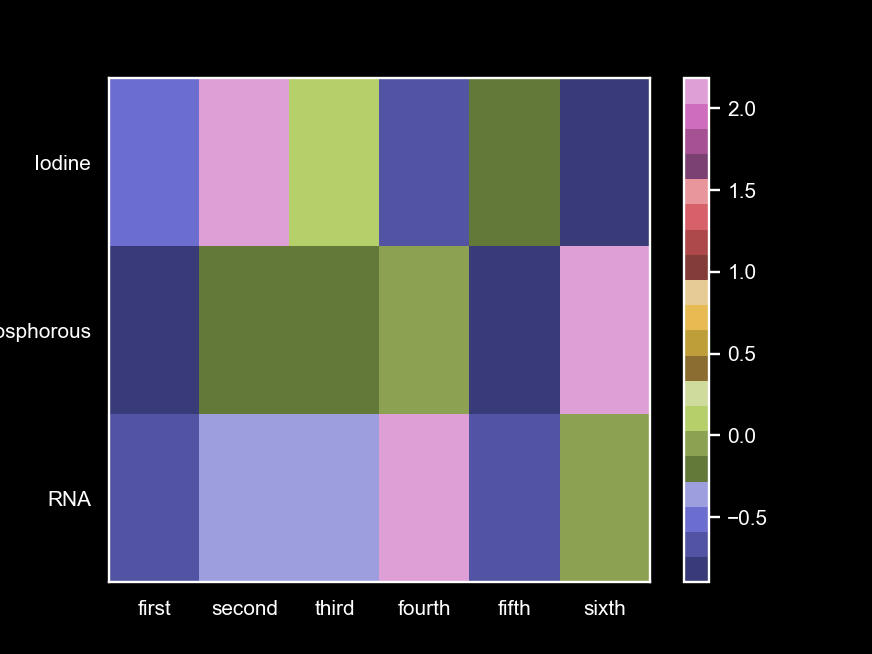

In [207]:
X=X_zscore.transpose()
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111)
X = X
columns = ["first", "second", "third",
           "fourth", "fifth", "sixth"]
index = ["RNA","Phosphorous","Iodine"]
plt.pcolor(X,cmap = 'tab20b')
plt.yticks(np.arange(0.5, len(index), 1), index)
plt.xticks(np.arange(0.5, len(columns), 1), columns)
plt.colorbar()
plt.show()

## Back to heat map Code

In [208]:

# ## this is log transformation 
heat_map_iod = np.log(heat_map_iod)
heat_map_iod = np.where(heat_map_iod== -inf , 0, heat_map_iod)

heat_map_rna = np.log(heat_map_rna)
heat_map_rna = np.where(heat_map_rna == -inf , 0, heat_map_rna)

heat_map_phos = np.log(heat_map_phos)
heat_map_phos = np.where(heat_map_phos == -inf , 0, heat_map_phos)

X = pd.DataFrame({'Iodine': heat_map_iod, 'RNA': heat_map_rna,'Phosphorous': heat_map_phos})
X

Iodine        RNA  Phosphorous
0  10.491524  12.670552    17.550576
1  13.135120  13.983123    18.746304
2  12.871741  13.953070    17.933887
3  15.220759  14.117782    17.332406
4  10.534759  12.666496    17.726739
5  13.727900  15.313550    17.018220

<IPython.core.display.Javascript object>


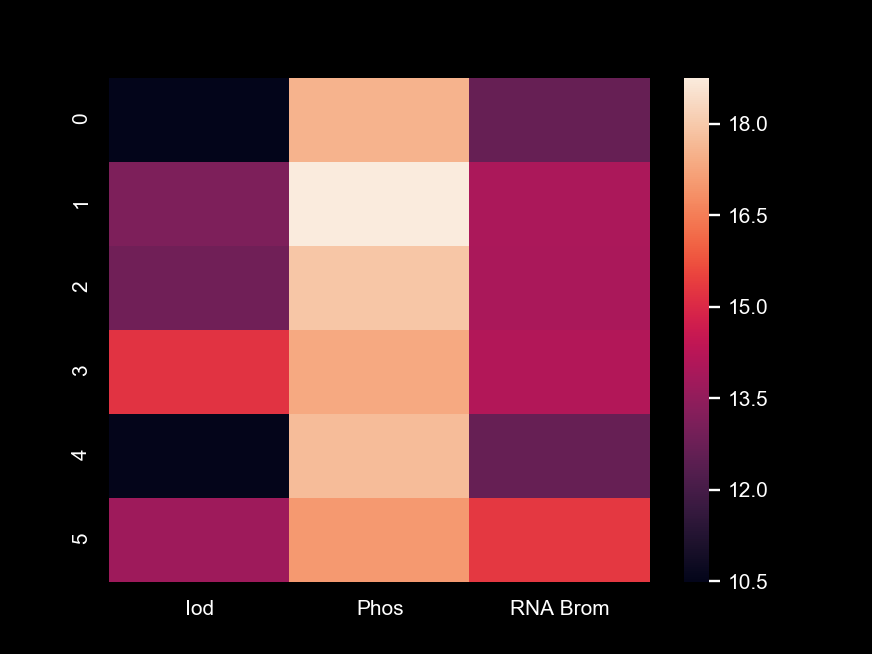

In [209]:
d = pd.DataFrame({'Iod': heat_map_iod, 'Phos': heat_map_phos,'RNA Brom': heat_map_rna})
fig = plt.figure()
ax = fig.add_subplot(111)
sns.heatmap(d)

## Plotting the clusters 

<IPython.core.display.Javascript object>


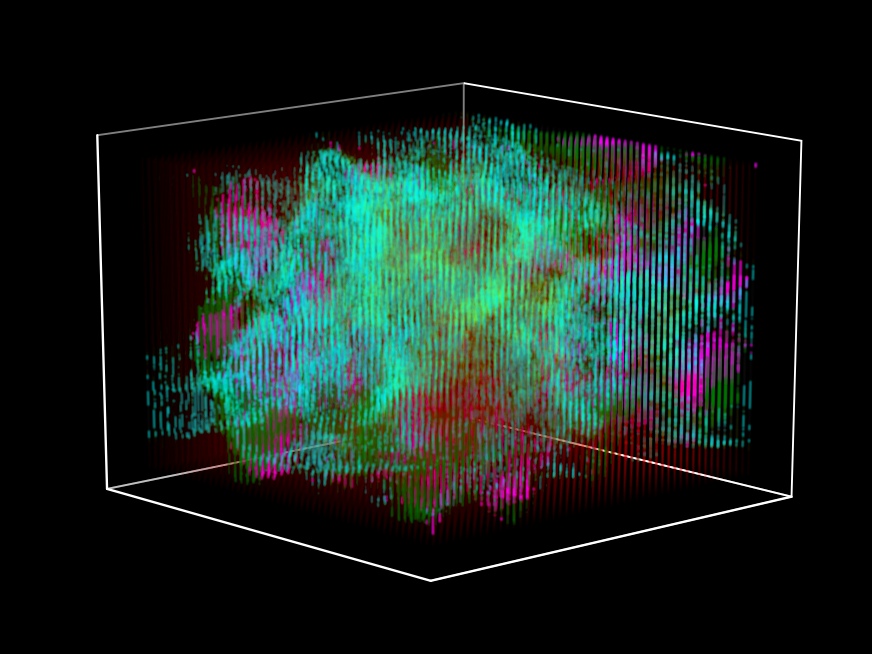

In [124]:
fig = plt.figure()
ax = Axes3D(fig) 
#ax.scatter3D(x_count_rna[50000:900000],y_count_rna[50000:900000],z_count_rna[50000:900000],color = "green" ,s= 2, alpha = 0.05)
ax.scatter3D([x_list[i] for i in zeros_indices],[y_list[i] for i in zeros_indices],[z_list[i] for i in zeros_indices],s = 1,color = "red", alpha = 0.01)
ax.scatter3D([x_list[i] for i in one_indices],[y_list[i] for i in one_indices],[z_list[i] for i in one_indices],s = 1,color = "gray", alpha = 0.01)
ax.scatter3D([x_list[i] for i in two_indices],[y_list[i] for i in two_indices],[z_list[i] for i in two_indices],s = 1,color = "green", alpha = 0.1)
ax.scatter3D([x_list[i] for i in three_indices],[y_list[i] for i in three_indices],[z_list[i] for i in three_indices],s = 1,color = "yellow", alpha = 0.01)
ax.scatter3D([x_list[i] for i in four_indices],[y_list[i] for i in four_indices],[z_list[i] for i in four_indices],s = 1,color = "cyan", alpha = 0.1)
ax.scatter3D([x_list[i] for i in five_indices],[y_list[i] for i in five_indices],[z_list[i] for i in five_indices],s = 1,color = "magenta", alpha = 0.2)
#ax.scatter3D([x_list[i] for i in zeros_indices],[y_list[i] for i in zeros_indices],[z_list[i] for i in zeros_indices],s = 2,color = "red", alpha = 0.1)
#ax.set_zlim3d(6,8)                    # viewrange for z-axis should be [-4,4] 
#ax.set_ylim3d(100,150)                    # viewrange for y-axis should be [-2,2] 
#ax.set_xlim3d(100,150)
#ax.set_zlim3d(100,150)  

#img = ax.scatter3D(wow_p2[:,0],wow_p2[:,1],wow_p2[:,2],cmap = phos_value,s = 0.8,color = "red", alpha = 0.05)
#img = ax.scatter3D(wow_r2[:,0],wow_r2[:,1],wow_r2[:,2],cmap = rna_value,s = 0.8,color = "green", alpha = 0.02)

#img = ax.scatter3D(wow_r0[:,0],wow_r0[:,1],wow_r0[:,2],cmap = rna_value,s = 2,color = "yellow", alpha = 0.01)
#img = ax.scatter3D(wow_r1[:,0],wow_r1[:,1],wow_r1[:,2],cmap = rna_value,s = 2,color = "green", alpha = 0.05)
#img = ax.scatter3D(wow_r2[:,0],wow_r2[:,1],wow_r2[:,2],cmap = rna_value,s = 2,color = "red", alpha = 0.01)
#img = ax.scatter3D(wow_r3[:,0],wow_r3[:,1],wow_r3[:,2],cmap = rna_value,s = 2,color = "magenta", alpha = 0.05)
#img = ax.scatter3D(wow_r4[:,0],wow_r4[:,1],wow_r4[:,2],cmap = rna_value,s = 2,color = "blue", alpha = 0.01)
#img = ax.scatter3D(wow_r5[:,0],wow_r5[:,1],wow_r5[:,2],cmap = rna_value,s = 2,color = "cyan", alpha = 0.05)

#img = ax.scatter3D(wow_i0[:,0],wow_i0[:,1],wow_i0[:,2],cmap = iod_value,s = 2,color = "yellow", alpha = 0.02)
#img = ax.scatter3D(wow_i1[:,0],wow_i1[:,1],wow_i1[:,2],cmap = iod_value,s = 2,color = "green", alpha = 0.02)
#img = ax.scatter3D(wow_i2[:,0],wow_i2[:,1],wow_i2[:,2],cmap = iod_value,s = 2,color = "red", alpha = 0.02)
#img = ax.scatter3D(wow_i3[:,0],wow_i3[:,1],wow_i3[:,2],cmap = iod_value,s = 2,color = "magenta", alpha = 0.05)
#img = ax.scatter3D(wow_i4[:,0],wow_i4[:,1],wow_i4[:,2],cmap = iod_value,s = 2,color = "blue", alpha = 0.02)
#img = ax.scatter3D(wow_i5[:,0],wow_i5[:,1],wow_i5[:,2],cmap = iod_value,s = 2,color = "cyan", alpha = 0.05)


#fig.colorbar(img)
# First remove fill
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
ax.grid(False)
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
plt.gca().patch.set_facecolor('black')
# Bonus: To get rid of the grid as well:

#fig.colorbar(img)
#frame1 = plt.gca()
#frame1.axes.get_xaxis().set_ticks([])
#frame1.axes.get_yaxis().set_ticks([])
#frame1.axes.get_zaxis().set_ticks([])

ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
#ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xlim(ax.get_xlim()[::-1])
plt.show()

plt.savefig('Cell11datanew-6clusters-nointensity-01112020.png',bbox_inches='tight')

<IPython.core.display.Javascript object>


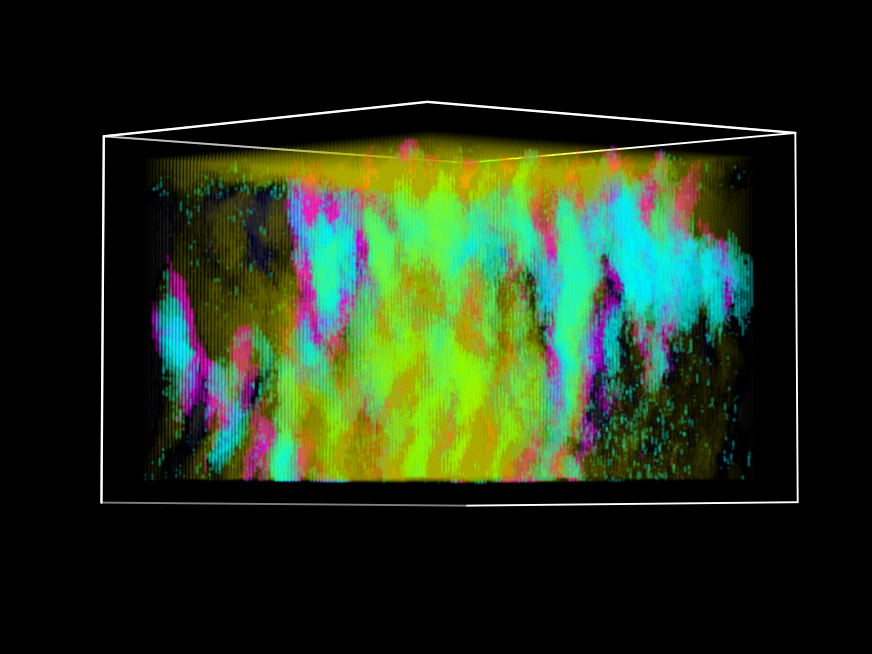

In [167]:
fig = plt.figure()
ax = Axes3D(fig) 
#ax.scatter3D(x_count_rna[50000:900000],y_count_rna[50000:900000],z_count_rna[50000:900000],color = "green" ,s= 2, alpha = 0.05)
ax.scatter3D([x_list[i] for i in zeros_indices],[y_list[i] for i in zeros_indices],[z_list[i] for i in zeros_indices],s = 0.8,color = "red", alpha = 0.001)
ax.scatter3D([x_list[i] for i in one_indices],[y_list[i] for i in one_indices],[z_list[i] for i in one_indices],s = 0.8,color = "gray", alpha = 0.01)
ax.scatter3D([x_list[i] for i in two_indices],[y_list[i] for i in two_indices],[z_list[i] for i in two_indices],s = 0.8,color = "yellow", alpha = 0.01)
ax.scatter3D([x_list[i] for i in three_indices],[y_list[i] for i in three_indices],[z_list[i] for i in three_indices],s = 0.8,color = "magenta", alpha = 0.1)
ax.scatter3D([x_list[i] for i in four_indices],[y_list[i] for i in four_indices],[z_list[i] for i in four_indices],s = 0.8,color = "blue", alpha = 0.005)
ax.scatter3D([x_list[i] for i in five_indices],[y_list[i] for i in five_indices],[z_list[i] for i in five_indices],s = 0.8,color = "cyan", alpha = 0.1)
#ax.scatter3D([x_list[i] for i in zeros_indices],[y_list[i] for i in zeros_indices],[z_list[i] for i in zeros_indices],s = 2,color = "red", alpha = 0.1)
#ax.set_zlim3d(6,8)                    # viewrange for z-axis should be [-4,4] 
#ax.set_ylim3d(100,150)                    # viewrange for y-axis should be [-2,2] 
#ax.set_xlim3d(100,150)
#ax.set_zlim3d(100,150)  

#img = ax.scatter3D(wow_p2[:,0],wow_p2[:,1],wow_p2[:,2],cmap = phos_value,s = 0.8,color = "red", alpha = 0.05)
#img = ax.scatter3D(wow_r2[:,0],wow_r2[:,1],wow_r2[:,2],cmap = rna_value,s = 0.8,color = "green", alpha = 0.02)

#img = ax.scatter3D(wow_r0[:,0],wow_r0[:,1],wow_r0[:,2],cmap = rna_value,s = 2,color = "yellow", alpha = 0.01)
#img = ax.scatter3D(wow_r1[:,0],wow_r1[:,1],wow_r1[:,2],cmap = rna_value,s = 2,color = "green", alpha = 0.05)
#img = ax.scatter3D(wow_r2[:,0],wow_r2[:,1],wow_r2[:,2],cmap = rna_value,s = 2,color = "red", alpha = 0.01)
#img = ax.scatter3D(wow_r3[:,0],wow_r3[:,1],wow_r3[:,2],cmap = rna_value,s = 2,color = "magenta", alpha = 0.05)
#img = ax.scatter3D(wow_r4[:,0],wow_r4[:,1],wow_r4[:,2],cmap = rna_value,s = 2,color = "blue", alpha = 0.01)
#img = ax.scatter3D(wow_r5[:,0],wow_r5[:,1],wow_r5[:,2],cmap = rna_value,s = 2,color = "cyan", alpha = 0.05)

#img = ax.scatter3D(wow_i0[:,0],wow_i0[:,1],wow_i0[:,2],cmap = iod_value,s = 2,color = "yellow", alpha = 0.02)
#img = ax.scatter3D(wow_i1[:,0],wow_i1[:,1],wow_i1[:,2],cmap = iod_value,s = 2,color = "green", alpha = 0.02)
#img = ax.scatter3D(wow_i2[:,0],wow_i2[:,1],wow_i2[:,2],cmap = iod_value,s = 2,color = "red", alpha = 0.02)
#img = ax.scatter3D(wow_i3[:,0],wow_i3[:,1],wow_i3[:,2],cmap = iod_value,s = 2,color = "magenta", alpha = 0.05)
#img = ax.scatter3D(wow_i4[:,0],wow_i4[:,1],wow_i4[:,2],cmap = iod_value,s = 2,color = "blue", alpha = 0.02)
#img = ax.scatter3D(wow_i5[:,0],wow_i5[:,1],wow_i5[:,2],cmap = iod_value,s = 2,color = "cyan", alpha = 0.05)


#fig.colorbar(img)
# First remove fill
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
ax.grid(False)
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
plt.gca().patch.set_facecolor('black')
# Bonus: To get rid of the grid as well:

#fig.colorbar(img)
#frame1 = plt.gca()
#frame1.axes.get_xaxis().set_ticks([])
#frame1.axes.get_yaxis().set_ticks([])
#frame1.axes.get_zaxis().set_ticks([])

ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
#ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xlim(ax.get_xlim()[::-1])
plt.show()

plt.savefig('Cell11data-6clusters-nointensity-01122020.png',bbox_inches='tight')


<IPython.core.display.Javascript object>


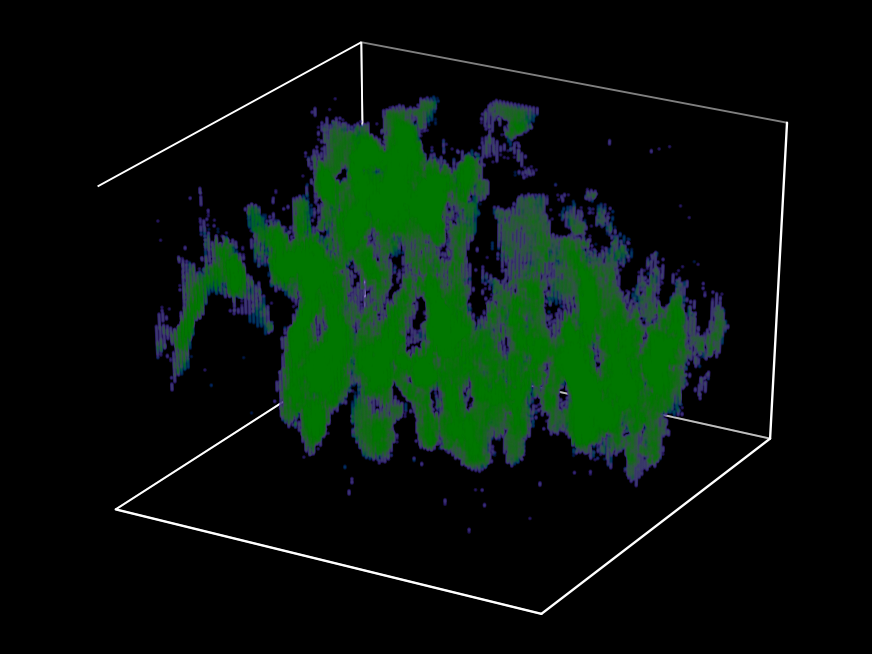

In [214]:
fig = plt.figure()
ax = Axes3D(fig) 
#ax.scatter3D(x_count_rna[50000:900000],y_count_rna[50000:900000],z_count_rna[50000:900000],color = "green" ,s= 2, alpha = 0.05)
#ax.scatter3D([x_list[i] for i in zeros_indices],[y_list[i] for i in zeros_indices],[z_list[i] for i in zeros_indices],s = 2,color = "orange", alpha = 0.3)
#ax.scatter3D([x_list[i] for i in one_indices],[y_list[i] for i in one_indices],[z_list[i] for i in one_indices],s = 2,color = "violet", alpha = 0.01)
#ax.scatter3D([x_list[i] for i in two_indices],[y_list[i] for i in two_indices],[z_list[i] for i in two_indices],s = 2,color = "red", alpha = 0.1)
ax.scatter3D([x_list[i] for i in three_indices],[y_list[i] for i in three_indices],[z_list[i] for i in three_indices],s = 0.8,color = "blue", alpha = 0.2)
#ax.scatter3D([x_list[i] for i in four_indices],[y_list[i] for i in four_indices],[z_list[i] for i in four_indices],s = 2,color = "pink", alpha = 0.1)
#ax.scatter3D([x_list[i] for i in five_indices],[y_list[i] for i in five_indices],[z_list[i] for i in five_indices],s = 2,color = "green", alpha = 0.1)
#ax.scatter3D([x_list[i] for i in zeros_indices],[y_list[i] for i in zeros_indices],[z_list[i] for i in zeros_indices],s = 2,color = "red", alpha = 0.1)
#ax.set_zlim3d(6,8)                    # viewrange for z-axis should be [-4,4] 
#ax.set_ylim3d(100,150)                    # viewrange for y-axis should be [-2,2] 
#ax.set_xlim3d(100,150)  
#img = ax.scatter3D(wow_p3[:,0],wow_p3[:,1],wow_p3[:,2],cmap = phos_value,s = 0.3,color = "red", alpha = 0.3)
img = ax.scatter3D(wow_r3[:,0],wow_r3[:,1],wow_r3[:,2],cmap = rna_value,s = 1,color = "magenta", alpha = 0.1)
img = ax.scatter3D(wow_i3[:,0],wow_i3[:,1],wow_i3[:,2],cmap = iod_value,s = 1,color = "green", alpha = 0.1)
#fig.colorbar(img)
# First remove fill
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
ax.grid(False)
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
plt.gca().patch.set_facecolor('black')
# Bonus: To get rid of the grid as well:

#fig.colorbar(img)
#frame1 = plt.gca()
#frame1.axes.get_xaxis().set_ticks([])
#frame1.axes.get_yaxis().set_ticks([])
#frame1.axes.get_zaxis().set_ticks([])

ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
#ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xlim(ax.get_xlim()[::-1])
plt.show()

plt.savefig('Cell11data-6clusters-4thclusterwithBandIsec-01122020.png',bbox_inches='tight')

<IPython.core.display.Javascript object>


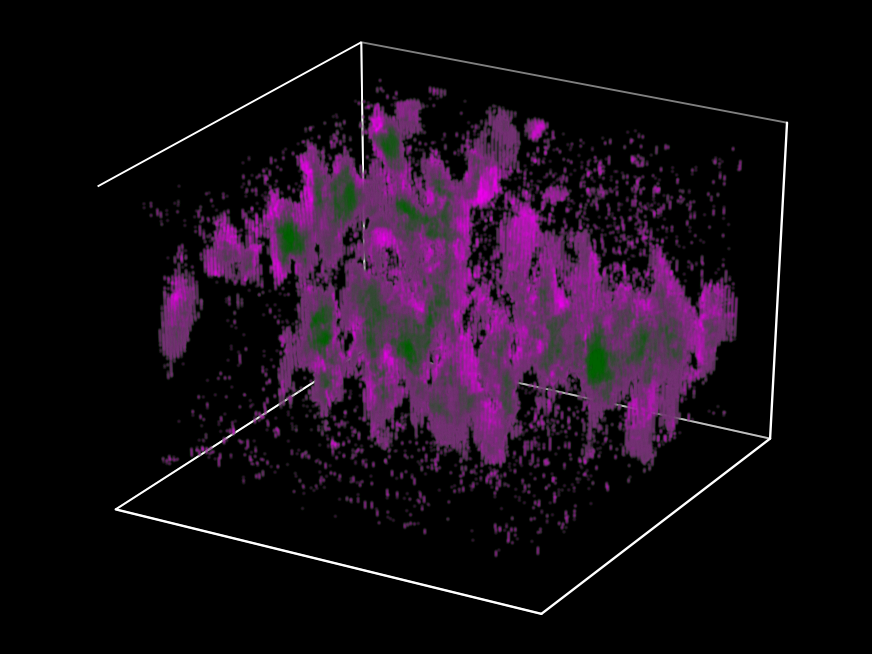

In [213]:
fig = plt.figure()
ax = Axes3D(fig) 
#ax.scatter3D(x_count_rna[50000:900000],y_count_rna[50000:900000],z_count_rna[50000:900000],color = "green" ,s= 2, alpha = 0.05)
#ax.scatter3D([x_list[i] for i in zeros_indices],[y_list[i] for i in zeros_indices],[z_list[i] for i in zeros_indices],s = 2,color = "orange", alpha = 0.3)
#ax.scatter3D([x_list[i] for i in one_indices],[y_list[i] for i in one_indices],[z_list[i] for i in one_indices],s = 2,color = "violet", alpha = 0.01)
#ax.scatter3D([x_list[i] for i in two_indices],[y_list[i] for i in two_indices],[z_list[i] for i in two_indices],s = 2,color = "red", alpha = 0.1)
#ax.scatter3D([x_list[i] for i in three_indices],[y_list[i] for i in three_indices],[z_list[i] for i in three_indices],s = 2,color = "black", alpha = 0.1)
#ax.scatter3D([x_list[i] for i in four_indices],[y_list[i] for i in four_indices],[z_list[i] for i in four_indices],s = 0.8,color = "blue", alpha = 0.01)
ax.scatter3D([x_list[i] for i in five_indices],[y_list[i] for i in five_indices],[z_list[i] for i in five_indices],s = 2,color = "green", alpha = 0.1)
#ax.scatter3D([x_list[i] for i in zeros_indices],[y_list[i] for i in zeros_indices],[z_list[i] for i in zeros_indices],s = 2,color = "red", alpha = 0.1)
#ax.set_zlim3d(6,8)                    # viewrange for z-axis should be [-4,4] 
#ax.set_ylim3d(100,150)                    # viewrange for y-axis should be [-2,2] 
#ax.set_xlim3d(100,150)  
#img = ax.scatter3D(wow_p4[:,0],wow_p4[:,1],wow_p4[:,2],cmap = phos_value,s = 0.4,color = "red", alpha = 0.4)
img = ax.scatter3D(wow_r5[:,0],wow_r5[:,1],wow_r5[:,2],cmap = rna_value,s = 1,color = "magenta", alpha = 0.10)
img = ax.scatter3D(wow_i5[:,0],wow_i5[:,1],wow_i5[:,2],cmap = iod_value,s = 1,color = "green", alpha = 0.03)
#fig.colorbar(img)
# First remove fill
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
ax.grid(False)
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
plt.gca().patch.set_facecolor('black')
# Bonus: To get rid of the grid as well:

#fig.colorbar(img)
#frame1 = plt.gca()
#frame1.axes.get_xaxis().set_ticks([])
#frame1.axes.get_yaxis().set_ticks([])
#frame1.axes.get_zaxis().set_ticks([])

ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
#ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xlim(ax.get_xlim()[::-1])
plt.show()

plt.savefig('Cell11data-6clusters-6thclusterwithBandI-01122020.png',bbox_inches='tight')

<IPython.core.display.Javascript object>


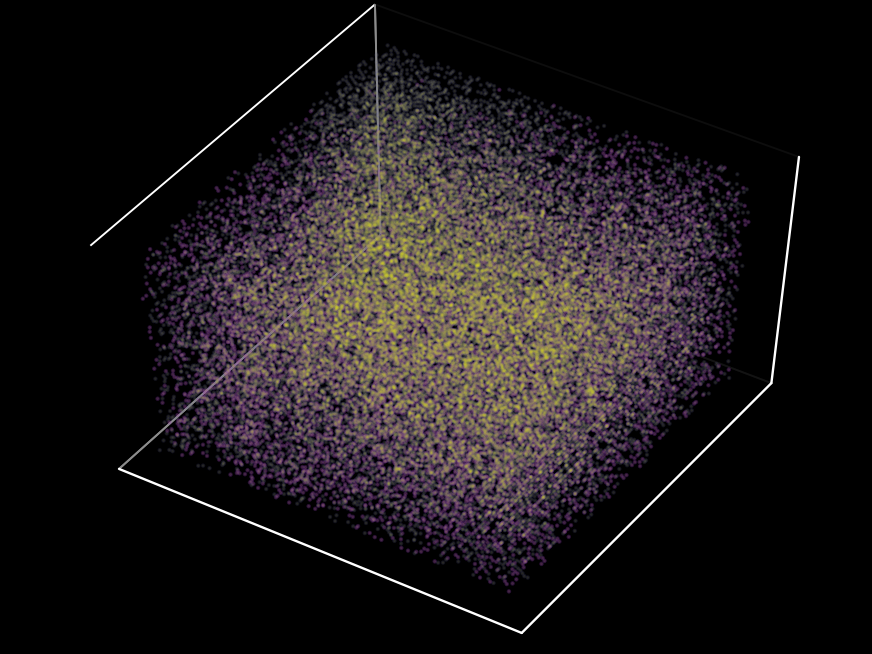

In [66]:
fig = plt.figure()
ax = Axes3D(fig) 
#ax.scatter3D(x_count_rna[50000:900000],y_count_rna[50000:900000],z_count_rna[50000:900000],color = "green" ,s= 2, alpha = 0.05)
#ax.scatter3D([x_list[i] for i in zeros_indices],[y_list[i] for i in zeros_indices],[z_list[i] for i in zeros_indices],s = 2,color = "orange", alpha = 0.3)
#ax.scatter3D([x_list[i] for i in one_indices],[y_list[i] for i in one_indices],[z_list[i] for i in one_indices],s = 2,color = "violet", alpha = 0.01)
ax.scatter3D([x_list[i] for i in two_indices],[y_list[i] for i in two_indices],[z_list[i] for i in two_indices],s = 2,color = "blue", alpha = 0.1)
#img =ax.scatter3D([x_list[i] for i in three_indices],[y_list[i] for i in three_indices],[z_list[i] for i in three_indices],s = 0.8,color = "blue", alpha = 0.2)
#ax.scatter3D([x_list[i] for i in four_indices],[y_list[i] for i in four_indices],[z_list[i] for i in four_indices],s = 2,color = "blue", alpha = 0.05)
#ax.scatter3D([x_list[i] for i in five_indices],[y_list[i] for i in five_indices],[z_list[i] for i in five_indices],s = 2,color = "blue", alpha = 0.1)
#ax.scatter3D([x_list[i] for i in zeros_indices],[y_list[i] for i in zeros_indices],[z_list[i] for i in zeros_indices],s = 2,color = "red", alpha = 0.1)
#ax.set_zlim3d(6,8)                    # viewrange for z-axis should be [-4,4] 
#ax.set_ylim3d(100,150)                    # viewrange for y-axis should be [-2,2] 
#ax.set_xlim3d(100,150)  
#img = ax.scatter3D(wow_p3[:,0],wow_p3[:,1],wow_p3[:,2],cmap = phos_value,s = 0.3,color = "red", alpha = 0.3)
ax.scatter3D(wow_r2[:,0],wow_r2[:,1],wow_r2[:,2],cmap = rna_value,s = 2,color = "magenta", alpha = 0.1)
ax.scatter3D(wow_i2[:,0],wow_i2[:,1],wow_i2[:,2],cmap = iod_value,s = 1.5,color = "yellow", alpha = 0.082)
#fig.colorbar(img)
# First remove fill
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
ax.grid(False)
ax.xaxis.pane.set_edgecolor('k')
ax.yaxis.pane.set_edgecolor('k')
ax.zaxis.pane.set_edgecolor('k')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
plt.gca().patch.set_facecolor('black')
# Bonus: To get rid of the grid as well:

#fig.colorbar(img)
#frame1 = plt.gca()
#frame1.axes.get_xaxis().set_ticks([])
#frame1.axes.get_yaxis().set_ticks([])
#frame1.axes.get_zaxis().set_ticks([])

ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
#ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xlim(ax.get_xlim()[::-1])
plt.show()

plt.savefig('Cell11datanew-6clusters-3thcluster-01112020.png',bbox_inches='tight')

<IPython.core.display.Javascript object>


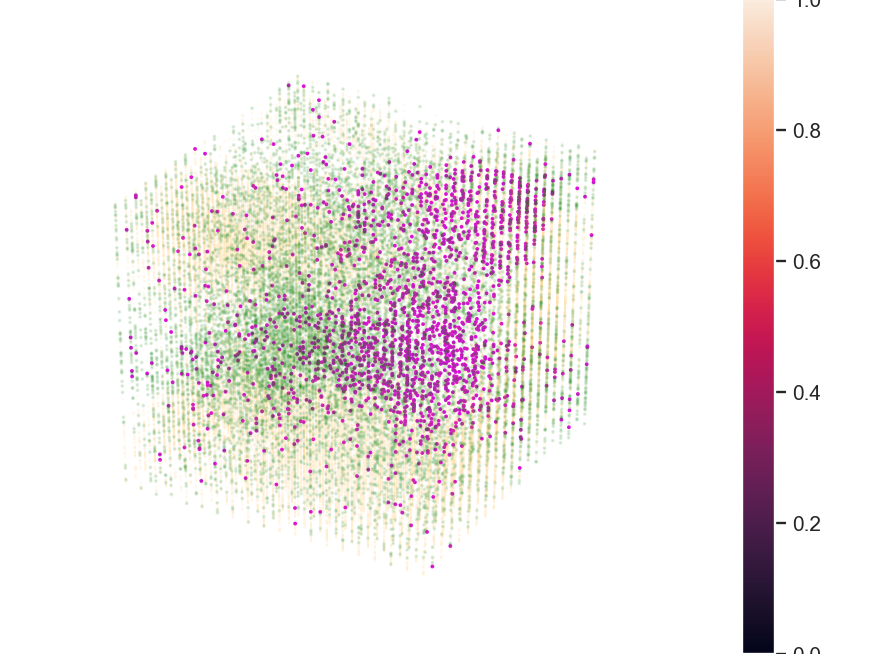

In [307]:
fig = plt.figure()
ax = Axes3D(fig) 
#ax.scatter3D(x_count_rna[50000:900000],y_count_rna[50000:900000],z_count_rna[50000:900000],color = "green" ,s= 2, alpha = 0.05)
ax.scatter3D([x_list[i] for i in zeros_indices],[y_list[i] for i in zeros_indices],[z_list[i] for i in zeros_indices],s = 0.01,color = "orange", alpha = 0.3)
#ax.scatter3D([x_list[i] for i in one_indices],[y_list[i] for i in one_indices],[z_list[i] for i in one_indices],s = 2,color = "violet", alpha = 0.01)
#ax.scatter3D([x_list[i] for i in two_indices],[y_list[i] for i in two_indices],[z_list[i] for i in two_indices],final_iodine_two,s = 2,color = "red", alpha = 1)
#ax.scatter3D([x_list[i] for i in three_indices],[y_list[i] for i in three_indices],[z_list[i] for i in three_indices],s = 2,color = "black", alpha = 0.1)
#ax.scatter3D([x_list[i] for i in four_indices],[y_list[i] for i in four_indices],[z_list[i] for i in four_indices],s = 2,color = "pink", alpha = 0.1)
#ax.scatter3D([x_list[i] for i in five_indices],[y_list[i] for i in five_indices],[z_list[i] for i in five_indices],s = 2,color = "green", alpha = 0.1)
#ax.scatter3D([x_list[i] for i in zeros_indices],[y_list[i] for i in zeros_indices],[z_list[i] for i in zeros_indices],s = 2,color = "red", alpha = 0.1)
#ax.set_zlim3d(6,8)                    # viewrange for z-axis should be [-4,4] 
#ax.set_ylim3d(100,150)                    # viewrange for y-axis should be [-2,2] 
#ax.set_xlim3d(100,150)  
ax.scatter3D(wow_r2[:,0],wow_r2[:,1],wow_r2[:,2],s = 1,color = "green", alpha = 0.11)
ax.scatter3D(wow_i2[:,0],wow_i2[:,1],wow_i2[:,2],s = 1,color = "magenta", alpha = 1)
#ax.scatter3D(wow2[:,0],wow2[:,1],wow2[:,2],s = 4,color = "yellow", alpha = 0.1)
#ax.scatter3D(wow3[:,0],wow3[:,1],wow3[:,2],s = 5,color = "pink", alpha = 0.1)
# First remove fill
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
ax.grid(False)
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
plt.gca().patch.set_facecolor('white')
# Bonus: To get rid of the grid as well:

fig.colorbar(img)
frame1 = plt.gca()
frame1.axes.get_xaxis().set_ticks([])
frame1.axes.get_yaxis().set_ticks([])
frame1.axes.get_zaxis().set_ticks([])
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xlim(ax.get_xlim()[::-1])
plt.show()

<IPython.core.display.Javascript object>


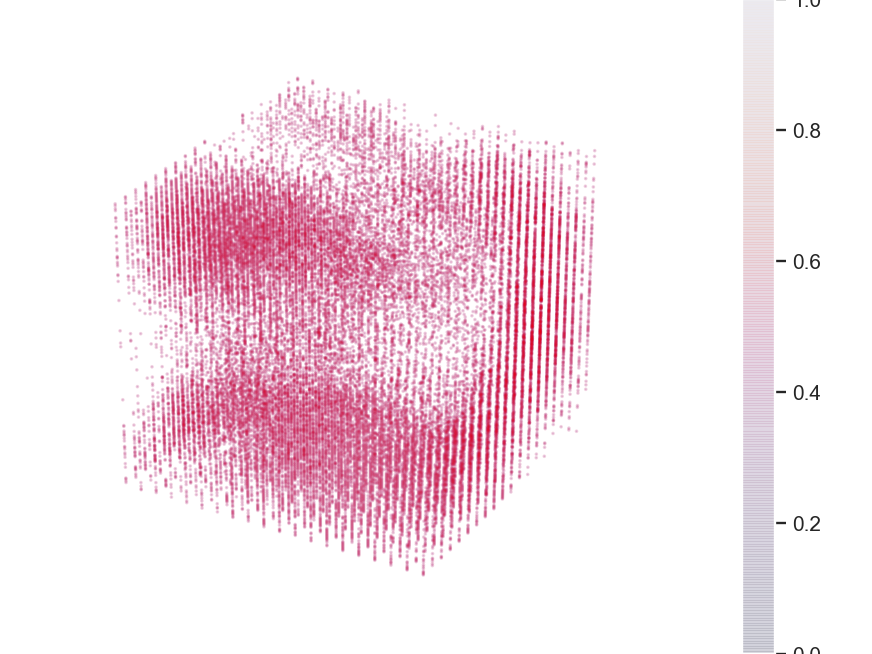

In [308]:
fig = plt.figure()
ax = Axes3D(fig) 
# #ax.scatter3D(x_count_rna[50000:900000],y_count_rna[50000:900000],z_count_rna[50000:900000],color = "green" ,s= 2, alpha = 0.05)
ax.scatter3D([x_list[i] for i in zeros_indices],[y_list[i] for i in zeros_indices],[z_list[i] for i in zeros_indices],s = 0.6,color = "blue", alpha = 0.08)
#ax.scatter3D([x_list[i] for i in zeros_indices],[y_list[i] for i in zeros_indices],[z_list[i] for i in zeros_indices],c = final_rna_zero ,alpha= 0.1, cmap='cool',s = 0.5)
#ax.scatter3D([x_list[i] for i in one_indices],[y_list[i] for i in one_indices],[z_list[i] for i in one_indices],s = 2,color = "violet", alpha = 0.01)
#ax.scatter3D([x_list[i] for i in two_indices],[y_list[i] for i in two_indices],[z_list[i] for i in two_indices],s = 2,color = "red", alpha = 0.1)
#ax.scatter3D([x_list[i] for i in three_indices],[y_list[i] for i in three_indices],[z_list[i] for i in three_indices],s = 2,color = "black", alpha = 0.1)
#ax.scatter3D([x_list[i] for i in four_indices],[y_list[i] for i in four_indices],[z_list[i] for i in four_indices],s = 2,color = "pink", alpha = 0.1)
#ax.scatter3D([x_list[i] for i in five_indices],[y_list[i] for i in five_indices],[z_list[i] for i in five_indices],s = 2,color = "green", alpha = 0.1)
#ax.scatter3D([x_list[i] for i in zeros_indices],[y_list[i] for i in zeros_indices],[z_list[i] for i in zeros_indices],s = 2,color = "red", alpha = 0.1)
#ax.set_zlim3d(6,8)                    # viewrange for z-axis should be [-4,4] 
#ax.set_ylim3d(100,150)                    # viewrange for y-axis should be [-2,2] 
#ax.set_xlim3d(100,150)  
img = ax.scatter3D(wow_p0[:,0],wow_p0[:,1],wow_p0[:,2],cmap = phos_value,s = 1,c = 'red', alpha = 0.1)
#img = ax.scatter3D(wow_r0[:,0],wow_r0[:,1],wow_r0[:,2],cmap = rna_value,s = 1,color = "red", alpha = 1)
#img = ax.scatter3D(wow_i0[:,0],wow_i0[:,1],wow_i0[:,2],cmap = iod_value,s = 2,color = "red", alpha = 1)
#fig.colorbar(img)
# First remove fill
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
ax.grid(False)
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
plt.gca().patch.set_facecolor('white')
# Bonus: To get rid of the grid as well:

fig.colorbar(img)
frame1 = plt.gca()
frame1.axes.get_xaxis().set_ticks([])
frame1.axes.get_yaxis().set_ticks([])
frame1.axes.get_zaxis().set_ticks([])
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xlim(ax.get_xlim()[::-1])
plt.show()


<IPython.core.display.Javascript object>


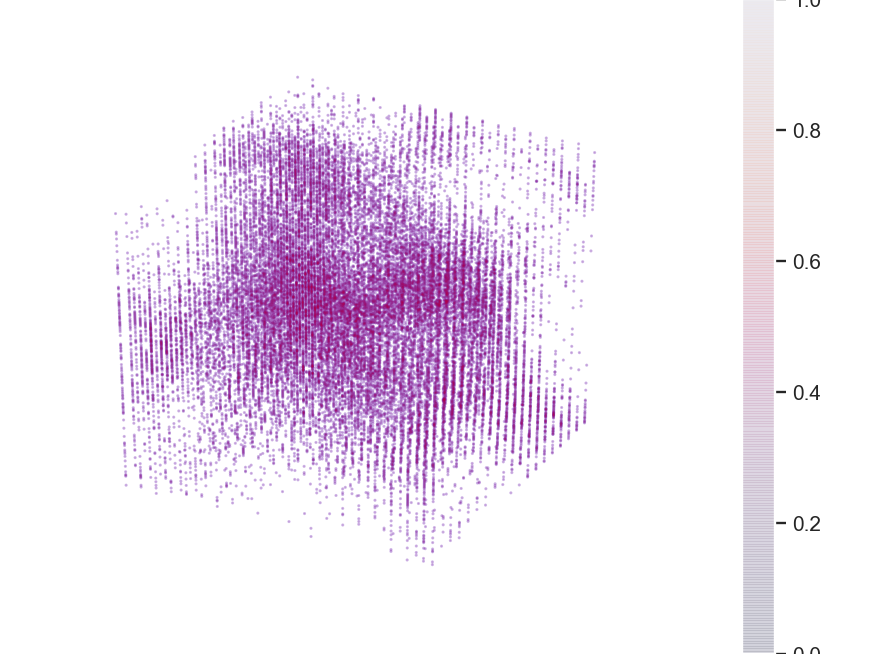

In [309]:
fig = plt.figure()
ax = Axes3D(fig) 
#ax.scatter3D(x_count_rna[50000:900000],y_count_rna[50000:900000],z_count_rna[50000:900000],color = "green" ,s= 2, alpha = 0.05)
#ax.scatter3D([x_list[i] for i in zeros_indices],[y_list[i] for i in zeros_indices],[z_list[i] for i in zeros_indices],s = 2,color = "orange", alpha = 0.3)
ax.scatter3D([x_list[i] for i in one_indices],[y_list[i] for i in one_indices],[z_list[i] for i in one_indices],s = 0.4,color = "blue", alpha = 0.2)
#ax.scatter3D([x_list[i] for i in two_indices],[y_list[i] for i in two_indices],[z_list[i] for i in two_indices],s = 2,color = "red", alpha = 0.1)
#ax.scatter3D([x_list[i] for i in three_indices],[y_list[i] for i in three_indices],[z_list[i] for i in three_indices],s = 2,color = "black", alpha = 0.1)
#ax.scatter3D([x_list[i] for i in four_indices],[y_list[i] for i in four_indices],[z_list[i] for i in four_indices],s = 2,color = "pink", alpha = 0.1)
#ax.scatter3D([x_list[i] for i in five_indices],[y_list[i] for i in five_indices],[z_list[i] for i in five_indices],s = 2,color = "green", alpha = 0.1)
#ax.scatter3D([x_list[i] for i in zeros_indices],[y_list[i] for i in zeros_indices],[z_list[i] for i in zeros_indices],s = 2,color = "red", alpha = 0.1)
#ax.set_zlim3d(6,8)                    # viewrange for z-axis should be [-4,4] 
#ax.set_ylim3d(100,150)                    # viewrange for y-axis should be [-2,2] 
#ax.set_xlim3d(100,150)  
img = ax.scatter3D(wow_p1[:,0],wow_p1[:,1],wow_p1[:,2],cmap = phos_value,s = 0.4,color = "red", alpha = 0.1)
#img = ax.scatter3D(wow_r1[:,0],wow_r1[:,1],wow_r1[:,2],cmap = rna_value,s = 0.8,color = "red", alpha = 0.5)
#img = ax.scatter3D(wow_i1[:,0],wow_i1[:,1],wow_i1[:,2],cmap = iod_value,s = 1,color = "red", alpha = 1)
# fig.colorbar(img)
# First remove fill
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
ax.grid(False)
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
plt.gca().patch.set_facecolor('white')
# Bonus: To get rid of the grid as well:

fig.colorbar(img)
frame1 = plt.gca()
frame1.axes.get_xaxis().set_ticks([])
frame1.axes.get_yaxis().set_ticks([])
frame1.axes.get_zaxis().set_ticks([])
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xlim(ax.get_xlim()[::-1])
plt.show()


<IPython.core.display.Javascript object>


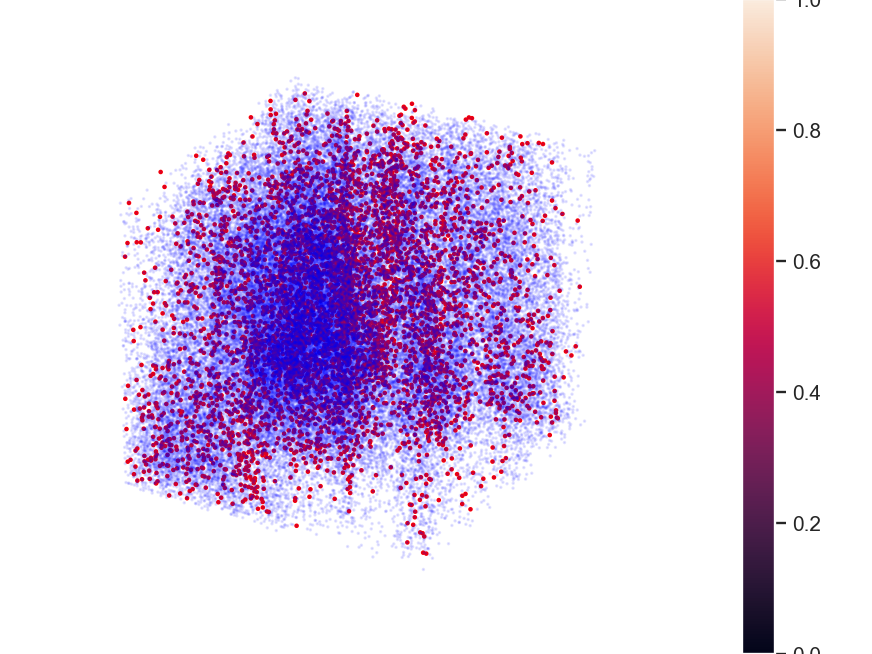

In [100]:
fig = plt.figure()
ax = Axes3D(fig) 
#ax.scatter3D(x_count_rna[50000:900000],y_count_rna[50000:900000],z_count_rna[50000:900000],color = "green" ,s= 2, alpha = 0.05)
#ax.scatter3D([x_list[i] for i in zeros_indices],[y_list[i] for i in zeros_indices],[z_list[i] for i in zeros_indices],s = 2,color = "orange", alpha = 0.3)
#ax.scatter3D([x_list[i] for i in one_indices],[y_list[i] for i in one_indices],[z_list[i] for i in one_indices],s = 2,color = "violet", alpha = 0.01)
ax.scatter3D([x_list[i] for i in two_indices],[y_list[i] for i in two_indices],[z_list[i] for i in two_indices],s = 0.7,color = "blue", alpha = 0.1)
#ax.scatter3D([x_list[i] for i in three_indices],[y_list[i] for i in three_indices],[z_list[i] for i in three_indices],s = 2,color = "black", alpha = 0.1)
#ax.scatter3D([x_list[i] for i in four_indices],[y_list[i] for i in four_indices],[z_list[i] for i in four_indices],s = 2,color = "pink", alpha = 0.1)
#ax.scatter3D([x_list[i] for i in five_indices],[y_list[i] for i in five_indices],[z_list[i] for i in five_indices],s = 2,color = "green", alpha = 0.1)
#ax.scatter3D([x_list[i] for i in zeros_indices],[y_list[i] for i in zeros_indices],[z_list[i] for i in zeros_indices],s = 2,color = "red", alpha = 0.1)
#ax.set_zlim3d(6,8)                    # viewrange for z-axis should be [-4,4] 
#ax.set_ylim3d(100,150)                    # viewrange for y-axis should be [-2,2] 
#ax.set_xlim3d(100,150)  
#img = ax.scatter3D(wow_p2[:,0],wow_p2[:,1],wow_p2[:,2],cmap = phos_value,s = 0.8,color = "red", alpha = 0.3)
#img = ax.scatter3D(wow_r2[:,0],wow_r2[:,1],wow_r2[:,2],cmap = rna_value,s = 0.8,color = "red", alpha = 0.3)
img = ax.scatter3D(wow_i2[:,0],wow_i2[:,1],wow_i2[:,2],cmap = iod_value,s = 2,color = "red", alpha = 1)
#fig.colorbar(img)
# First remove fill
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
ax.grid(False)
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
plt.gca().patch.set_facecolor('white')
# Bonus: To get rid of the grid as well:

fig.colorbar(img)
frame1 = plt.gca()
frame1.axes.get_xaxis().set_ticks([])
frame1.axes.get_yaxis().set_ticks([])
frame1.axes.get_zaxis().set_ticks([])
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xlim(ax.get_xlim()[::-1])
plt.show()

<IPython.core.display.Javascript object>


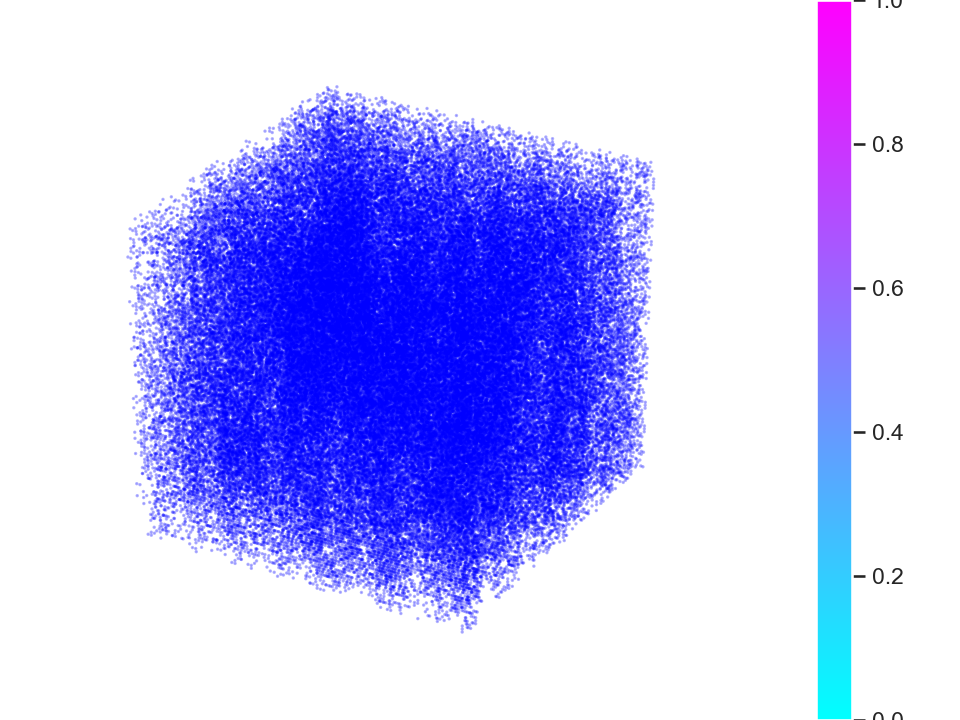

In [104]:
fig = plt.figure()
ax = Axes3D(fig) 
#ax.scatter3D(x_count_rna[50000:900000],y_count_rna[50000:900000],z_count_rna[50000:900000],color = "green" ,s= 2, alpha = 0.05)
#ax.scatter3D([x_list[i] for i in zeros_indices],[y_list[i] for i in zeros_indices],[z_list[i] for i in zeros_indices],s = 2,color = "orange", alpha = 0.3)
#ax.scatter3D([x_list[i] for i in one_indices],[y_list[i] for i in one_indices],[z_list[i] for i in one_indices],s = 2,color = "violet", alpha = 0.01)
#ax.scatter3D([x_list[i] for i in two_indices],[y_list[i] for i in two_indices],[z_list[i] for i in two_indices],s = 2,color = "red", alpha = 0.1)
ax.scatter3D([x_list[i] for i in three_indices],[y_list[i] for i in three_indices],[z_list[i] for i in three_indices],s = 0.4,color = "blue", alpha = 0.3)
#ax.scatter3D([x_list[i] for i in four_indices],[y_list[i] for i in four_indices],[z_list[i] for i in four_indices],s = 2,color = "pink", alpha = 0.1)
#ax.scatter3D([x_list[i] for i in five_indices],[y_list[i] for i in five_indices],[z_list[i] for i in five_indices],s = 2,color = "green", alpha = 0.1)
#ax.scatter3D([x_list[i] for i in zeros_indices],[y_list[i] for i in zeros_indices],[z_list[i] for i in zeros_indices],s = 2,color = "red", alpha = 0.1)
#ax.set_zlim3d(6,8)                    # viewrange for z-axis should be [-4,4] 
#ax.set_ylim3d(100,150)                    # viewrange for y-axis should be [-2,2] 
#ax.set_xlim3d(100,150)  
#img = ax.scatter3D(wow_p3[:,0],wow_p3[:,1],wow_p3[:,2],cmap = phos_value,s = 0.3,color = "red", alpha = 0.3)
#img = ax.scatter3D(wow_r3[:,0],wow_r3[:,1],wow_r3[:,2],cmap = rna_value,s = 0.8,color = "red", alpha = 0.5)
#img = ax.scatter3D(wow_i3[:,0],wow_i3[:,1],wow_i3[:,2],cmap = iod_value,s = 0.8,color = "red", alpha = 0.5)
#fig.colorbar(img)
# First remove fill
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# Now set color to white (or whatever is "invisible")
ax.grid(False)
ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
plt.gca().patch.set_facecolor('white')
# Bonus: To get rid of the grid as well:

fig.colorbar(img)
frame1 = plt.gca()
frame1.axes.get_xaxis().set_ticks([])
frame1.axes.get_yaxis().set_ticks([])
frame1.axes.get_zaxis().set_ticks([])
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xlim(ax.get_xlim()[::-1])
plt.show()

## Plotting 3D surf plots

## Plotting all the clusters, with axis limits

## Customized Colourmaps

In [114]:
df_p_0 = pd.DataFrame({'p_0':phos_cluster_zero})
df_p_1 = pd.DataFrame({'p_1':phos_cluster_one})
df_p_2 = pd.DataFrame({'p_2':phos_cluster_two})
df_p_3 = pd.DataFrame({'p_3':phos_cluster_three})
df_p_4 = pd.DataFrame({'p_4':phos_cluster_four})
df_p_5 = pd.DataFrame({'p_5':phos_cluster_five})

df_i_0 = pd.DataFrame({'i_0':iodine_cluster_zero})
df_i_1 = pd.DataFrame({'i_1':iodine_cluster_one})
df_i_2 = pd.DataFrame({'i_2':iodine_cluster_two})
df_i_3 = pd.DataFrame({'i_3':iodine_cluster_three})
df_i_4 = pd.DataFrame({'i_4':iodine_cluster_four})
df_i_5 = pd.DataFrame({'i_5':iodine_cluster_five})

df_r_0 = pd.DataFrame({'r_0':rna_cluster_zero})
df_r_1 = pd.DataFrame({'r_1':rna_cluster_one})
df_r_2 = pd.DataFrame({'r_2':rna_cluster_two})
df_r_3 = pd.DataFrame({'r_3':rna_cluster_three})
df_r_4 = pd.DataFrame({'r_4':rna_cluster_four})
df_r_5 = pd.DataFrame({'r_5':rna_cluster_five})

## Scaling the Data

In [115]:
iodine_cluster_zero = (iodine_cluster_zero - np.mean(phos_cluster_zero))/np.std(phos_cluster_zero)
phos_cluster_zero = (phos_cluster_zero - np.mean(phos_cluster_zero))/np.std(phos_cluster_zero)
rna_cluster_zero = (rna_cluster_zero - np.mean(phos_cluster_zero))/np.std(phos_cluster_zero)
print(np.max(phos_cluster_zero))
print(np.max(iodine_cluster_one))

iodine_cluster_one = (iodine_cluster_one  - np.mean(phos_cluster_one ))/np.std(phos_cluster_one )
phos_cluster_one  = (phos_cluster_one  - np.mean(phos_cluster_one ))/np.std(phos_cluster_one )
rna_cluster_one  = (rna_cluster_one  - np.mean(phos_cluster_one ))/np.std(phos_cluster_one )
print(np.max(phos_cluster_one))
print(np.min(iodine_cluster_one))

iodine_cluster_two = (iodine_cluster_two  - np.mean(phos_cluster_two ))/np.std(phos_cluster_two )
phos_cluster_two  = (phos_cluster_two  - np.mean(phos_cluster_two ))/np.std(phos_cluster_two )
rna_cluster_two  = (rna_cluster_two  - np.mean(phos_cluster_two ))/np.std(phos_cluster_two )
print(np.max(phos_cluster_two))
print(np.max(iodine_cluster_two))

iodine_cluster_three = (iodine_cluster_three - np.mean(phos_cluster_three ))/np.std(phos_cluster_three)
phos_cluster_three = (phos_cluster_three - np.mean(phos_cluster_three ))/np.std(phos_cluster_three )
rna_cluster_three = (rna_cluster_three - np.mean(phos_cluster_three ))/np.std(phos_cluster_three )
print(np.max(phos_cluster_three))
# print(np.min(iodine_cluster_three))

iodine_cluster_four = (iodine_cluster_four  - np.mean(phos_cluster_four ))/np.std(phos_cluster_four)
phos_cluster_four  = (phos_cluster_four - np.mean(phos_cluster_four))/np.std(phos_cluster_four)
rna_cluster_four = (rna_cluster_four  - np.mean(phos_cluster_four ))/np.std(phos_cluster_four)
print(np.max(phos_cluster_four))
print(np.max(iodine_cluster_four))

iodine_cluster_five = (iodine_cluster_five  - np.mean(phos_cluster_five ))/np.std(phos_cluster_five)
phos_cluster_five  = (phos_cluster_five  - np.mean(phos_cluster_five ))/np.std(phos_cluster_five)
rna_cluster_five  = (rna_cluster_five - np.mean(phos_cluster_five ))/np.std(phos_cluster_five)
print(np.max(phos_cluster_five))
print(np.max(iodine_cluster_five))

7.339978052293818
2
1.266197919397344
-4.858624039397775
6.08037027519735
-5.288614769476664
1.384642025344575
6.807597034569008
1.4992877917493108
1.5780437466892423
-3.545558800952068


In [116]:
cdict = {'yellow' : ((0.0,  0.0, 0.0),
                   (0.5,  0.0, 0.0),
                   (1.0,  1.0, 1.0)),
        'green': ((0.0,  0.0, 0.0),
                   (0.25, 0.0, 0.0),
                   (0.75, 1.0, 1.0),
                   (1.0,  1.0, 1.0)),
          
         'Orange':   ((0.0,  0.0, 0.0),
                   (0.5,  1.0, 1.0),
                   (1.0,  1.0, 1.0)),

         'Cyan':  ((0.0,  0.0, 0.0),
                   (0.5,  0.0, 0.0),
                   (1.0,  1.0, 1.0)),
        'Pink': ((0.0,  0.0, 0.0),
                   (0.5,  0.0, 0.0),
                   (1.0,  1.0, 1.0)),
        'Gray': ((0.0,  0.0, 0.0),
                   (0.5,  0.0, 0.0),
                   (1.0,  1.0, 1.0)),}

In [117]:
def discrete_cmap(N, base_cmap=None):
    """Create an N-bin discrete colormap from the specified input map"""

    # Note that if base_cmap is a string or None, you can simply do
    #    return plt.cm.get_cmap(base_cmap, N)
    # The following works for string, None, or a colormap instance:

    base = plt.cm.get_cmap(base_cmap)
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)
